This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/7_Clustering/N1_Kmeans_basic.ipynb)

# KMEANS basics 
The purpose of this lab is to implement simple 1D Kmeans clustering algorithm, and compare the obtained results with those obtained using sklearn implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline

## import data from matlab file : 

In [2]:
Data = loadmat("fictitious_train.mat")
print(Data.keys())
X = Data.get("Xtrain")
print("dim of X:{}".format(X.shape))

dict_keys(['__header__', '__version__', '__globals__', 'Xtrain'])
dim of X:(20, 1)


## Compute the histogram

In [3]:
bins = np.arange(np.min(X) - 1, np.max(X) + 2, 1)
hist_val, bins = np.histogram(X, bins=bins)
print(hist_val)
print(bins)

[0 4 2 5 1 4 3 1 0]
[-1.39 -0.39  0.61  1.61  2.61  3.61  4.61  5.61  6.61  7.61]


### or directly visualize the histogram 

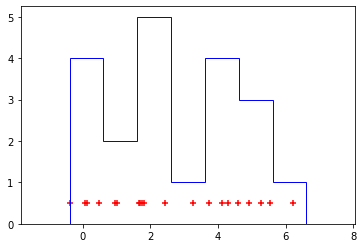

In [4]:
bins = np.arange(np.min(X) - 1, np.max(X) + 2, 1)
plt.scatter(X, np.zeros_like(X) + 0.5, c="red", marker="+")
n, bin_edges, patches = plt.hist(x=X, bins=bins, color="blue", histtype="step")

## Implementation of Kmean on a simple case
In this example, the number of clusters is assumed to be known. 

### Exercise 1 :
- Explain/ comment the code below
- What is the main problem left aside by this code? 

In [5]:
K = 2  # nb of clusters
p = 1  # dimension (the code below is given for p=1 only)

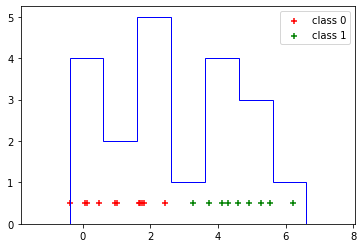

In [6]:
N = X.size
idx = np.zeros((N, 1))
muvec = np.zeros((K, 1))


change = True  # Defines the test variable for the loop.
# Default is true (meaning that a new iteration will be performed
perm = np.random.permutation(N)[0:2]
# takes two different random integers between 0 and $N$

for k in range(0, K):
    muvec[k] = X[perm[k], :]  # Initialization of the cluster representatives (centers)

for i in range(0, N):
    d = (X[i] - muvec) ** 2  # Computation of distances wrt cluster centers
    idx[i] = np.where(d == d.min())[0]  # label = index of closest center

while change:
    change = False
    # update
    for k in range(0, K):
        muvec[k] = np.mean(X[idx == k])  # compute new centers
    # prediction
    for i in range(0, N):
        d = (X[i] - muvec) ** 2  # Computation of distances wrt cluster centers
        index = np.where(d == d.min())[0]  ##label = index of closest center
        if index != idx[i]:  # check if some indices changed
            change = True
            idx[i] = index  # replaces new index set

X0 = X[idx == 0]
X1 = X[idx == 1]
bins = np.arange(np.min(X) - 1, np.max(X) + 2, 1)
n, bin_edges, patches = plt.hist(x=X, bins=bins, color="blue", histtype="step")
plt.scatter(X0, np.zeros_like(X0) + 0.5, c="red", marker="+", label="class 0")
plt.scatter(X1, np.zeros_like(X1) + 0.5, c="green", marker="+", label="class 1")
plt.legend()
h = plt.gcf()

### Exercise 2 : sklearn implementation 
- Compare the results obtained with the simple code above
- Comment and explain the role of the input parameters used in this implementation


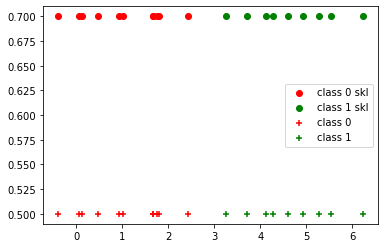

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init="k-means++", max_iter=10, n_init=10, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

Y0 = X[y_kmeans == 0]
Y1 = X[y_kmeans == 1]
plt.scatter(Y0, np.zeros_like(Y0) + 0.7, c="red", marker="o", label="class 0 skl")
plt.scatter(Y1, np.zeros_like(Y1) + 0.7, c="green", marker="o", label="class 1 skl")
plt.scatter(X0, np.zeros_like(X0) + 0.5, c="red", marker="+", label="class 0")
plt.scatter(X1, np.zeros_like(X1) + 0.5, c="green", marker="+", label="class 1")
plt.legend()